# Experimento 2 - Órdenes Conflictivas

In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import sys

sys.path.append("../..")

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Use latex
plt.rc("text", usetex=True)

## Definición

In [13]:
from experimento import Experimento
from src.generacion import (
    GeneradorInstancias,
    DistribucionIndependiente,
    DistribucionUniforme,
    DistribucionNormal,
)


experimento = Experimento(
    nombre="exp2",
    generador=GeneradorInstancias(
        cantidad_trabajadores=DistribucionUniforme(5, 10),
        cantidad_ordenes=DistribucionUniforme(5, 20),
        parametros_ordenes=DistribucionIndependiente(
            DistribucionNormal(10000, 2000),
            DistribucionUniforme(3, 10),
        ),
        cantidad_ordenes_conflictivas=DistribucionUniforme(5, 20),
    ),
    N=1000,
    seed=42,
)

## Ejecución

In [14]:
resultados = experimento.ejecutar()

## Análisis

In [15]:
from graficos import histograma, histograma_discreto, histograma_hue

### Distribución Función Objetivo

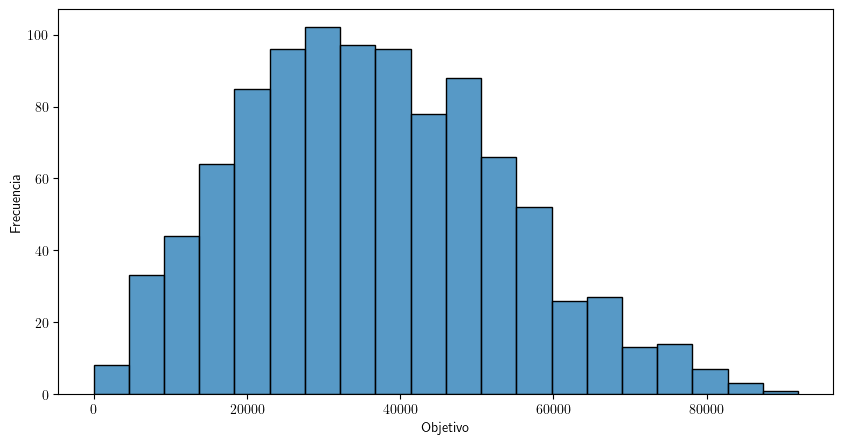

In [16]:
fig = histograma(resultados.objetivos, xlabel="Objetivo")

experimento.guardar_imagen(fig, "distribucion_objetivo")

In [17]:
pd.Series(resultados.objetivos).describe()

count     1000.000000
mean     36521.254557
std      17078.298788
min          0.000000
25%      23664.782282
50%      35407.594574
75%      48465.470096
max      91928.223369
dtype: float64

#### Comparación con Distribución Anterior

In [18]:
from experimento import cargar_resultados

optimos1 = pd.Series(cargar_resultados("exp1").objetivos)
optimos2 = pd.Series(resultados.objetivos)

In [19]:
from scipy import stats

stats.ttest_ind(optimos1, optimos2)

TtestResult(statistic=np.float64(2.0363915575603135), pvalue=np.float64(0.04184267425126718), df=np.float64(1998.0))

#### Proporción

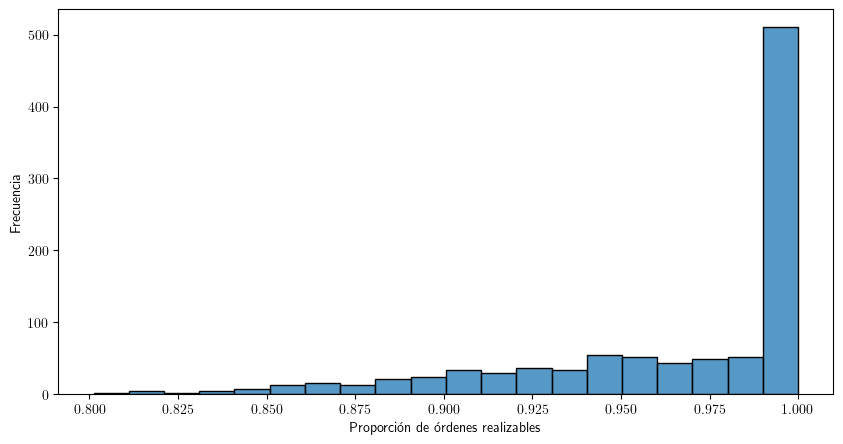

In [20]:
proporcion_optimos = [
    obj / instancia.bmp_realizables()
    for obj, instancia in zip(resultados.objetivos, resultados.instancias)
    if instancia.bmp_realizables() > 0
]

fig = histograma(proporcion_optimos, xlabel="Proporción de órdenes realizables")

experimento.guardar_imagen(fig, "distribucion_proporcion_objetivo")

### Cantidad de Órdenes

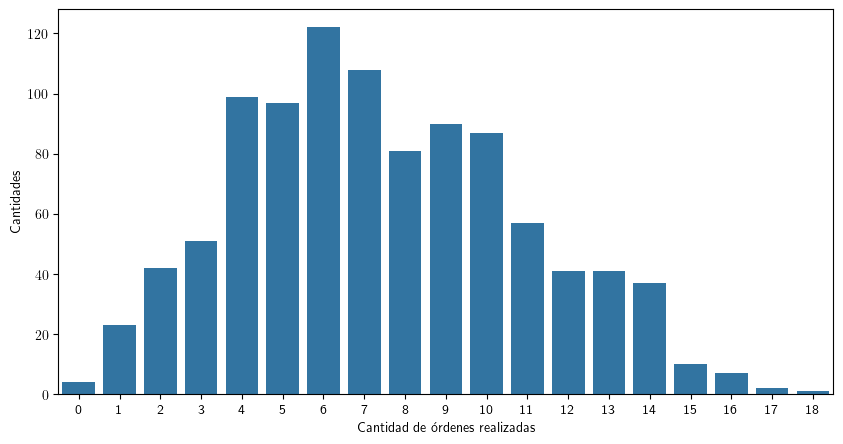

In [22]:
fig = histograma_discreto(
    [solucion.cantidad_de_ordenes_realizadas() for solucion in resultados.soluciones],
    xlabel="Cantidad de órdenes realizadas",
)

experimento.guardar_imagen(fig, "distribucion_cantidad_ordenes")

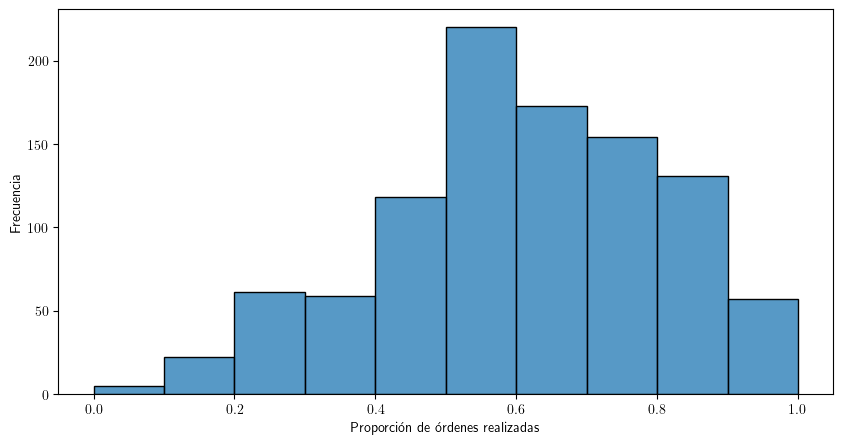

In [24]:
proporcion_ordenes = [
    solucion.cantidad_de_ordenes_realizadas() / len(instancia.ordenes)
    for solucion, instancia in zip(resultados.soluciones, resultados.instancias)
]

fig = histograma(proporcion_ordenes, xlabel="Proporción de órdenes realizadas", bins=10)

experimento.guardar_imagen(fig, "distribucion_proporcion_ordenes")